# Query
- Filtrera fram data
- Ofta när man filtrerar data är det på radnivå man gör det
    - Varje rad representerar ett objekt
    - T.ex. lista med studenter: Varje student har en del attribut i kolumnerna, men varje rad representerar en specifik student. 
    - Därför filtrera ofta på radnivå, vill hitta alla studenter som går en specifik klass t.ex. 


#### Eget om vilken ordning man gör olika filtreringar och liknande
Filtering Before Transforming: It's often a good practice to filter your data first to select the relevant subset before performing transformations or calculations. This ensures that you are working with the right data.

Sorting After Filtering: If sorting is required, it typically makes sense to apply it after filtering. This allows you to focus on the specific subset of data you're interested in.

Aggregations and Calculations: After filtering and sorting, you can perform aggregations, calculations, or any other data transformations that are needed.

Selecting Columns: Finally, you can select the columns you want to include in the final result.

Ultimately, the order of operations should align with your specific problem and analysis goals. Consider the logical flow of operations and make sure each step leads to the next in a way that makes sense for your task. Keep your code readable and easy to understand, and consider the context and requirements of the analysis you're conducting.







### Bool mask and bool indexing

In [2]:
import pandas as pd
import numpy as np

In [3]:
floats  = pd.DataFrame(np.random.randn(7,4), columns =["A", "B", "C","D"])
floats

,A,B,C,D
0,-0.230829,-1.641586,0.671282,-0.745308
1,-0.262765,-0.538644,-1.762417,0.327016
2,0.494392,0.152911,1.062974,-1.174234
3,-0.055931,-0.479112,-0.449992,1.126523
4,-1.994613,2.267538,-0.100459,-0.494353
5,-0.541363,-1.659223,-0.292138,0.542249
6,0.387379,1.546262,-0.697482,-0.712192


In [4]:
# Creating bool mask for column "B"

floats["B"] >= 0        # Skriver ut uttrycket direkt med False/True värden om villkoret inte uppfylls/uppfylls, vanligast
                        # Man sparar alltså inte detta i något objekt


# Using the bool mask in the dataframe, as typing column but bool mask instead: 
# Så som vi filtrerar fram på kolumnnamn, men anger bool mask istället
# Selecting all rows where "B" > = 0

floats[floats["B"] >= 0]   # Får ut enbart de rader med värden som är true i kolumnen


# Går att även göra för alla kolumner
# Creating bool mask for row "0", all columns
floats.loc[0, :] >= 0   # Bool mask för rad 0, samtliga kolumner skapas utifrån villkoret som specificeras


# Selecting all columns "0">= 0 
# Alla kolumner där rad 0 >= 0
floats.loc[:, floats.loc[0, :] >= 0]   # Skriver ut alla rader men enbart kolumner som matchar uttrycket som är inlagt

# Varje rad är ett objekt, kolumnerna attribut. DÄRFÖR Ofta vill filtrera på raden enligt nedan i allra flesta fall:
# Alla studenter i en viss klass osv.

,C
0,0.671282
1,-1.762417
2,1.062974
3,-0.449992
4,-0.100459
5,-0.292138
6,-0.697482


## Querying data
Filtering rows based on values of certain attributes can be done either with bool indexing (det han precis visat ovan) or pandas query method.
Filtrera ut alla rader/objekt som uppfyller visst villkor - attribut i kolumner, t.ex. viss student som går i en viss klass osv.


In [5]:
autos = pd.read_json("..\\Data\\autos.json")
autos.head(3)
# I denna data så är alltså varje rad en bil med olika specfikationer
# 'Make' är tillverkaren

,aspiration,body-style,bore,city-mpg,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,engine-type,...,make,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width
0,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,13495.0,2.68,3,88.6,64.1
1,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,16500.0,2.68,3,88.6,64.1
2,std,hatchback,2.68,19,9.0,2823,rwd,front,152,ohcv,...,alfa-romero,NaN,six,two,5000.0,16500.0,3.47,1,94.5,65.5


### Fortsätter här sedan, 16:50 i föreläsningen

In [6]:
# Filtrerar ut för att få fram kolumner 
autos[autos["make"] == "volvo"]   # Detta är ett sätt att få fram kolumner och enbart värdet 'volvo'

autos.query("make =='volvo'")     # Annat sätt att göra det på, via denna metod i pandas som heter query
                                  # 'volvo' är string value i kolumnen make och måste därför ha citationstecken
                                  # kolumnen i sig behöver inte ha det om den inte innehåller special characters
                                  
autos[autos["engine-size"] <= 140 ]   # Nu filtrerar istället på rader enligt detta kriterie
autos.query("`engine-size` <= 140")   # samma, via query , obs, vissa tecken går inte att skriva rakt av och behöver backticks
                                      # Ticks: alt + tangent till vänster om backspace. OBS BACKTICKS (eller double quotes OM tillämpligt) måste anges till kolumnnamn med special characters.
                                      # Om de inte har special characters räcker single quotes. 
                                      # Detta skrivs ut pga att engine-size har special character '-'


# Två villkor, tänk dock på precedence, sätter i parentes då för att bli rätt
# Här med & (and)
autos[(autos["make"] == "volvo") & (autos["engine-size"] <= 140)]

# Här med or | (or)
autos[(autos["make"] == "volvo") | (autos["engine-size"] <= 140)]

# Här samma sak via Queries:
# Så fort man har mer än ett villkor, blir query metoden mer lättläst.
autos.query("make == 'volvo' and `engine-size` <= 140")
autos.query("make == 'volvo' or `engine-size` <= 140")



# När man vill filtrera ut data såhär, det man får ut är nya dataframe.
# Man kan därför köra metoderna för dataframes på detta, t.ex.:
autos.query("make == 'volvo' or `engine-size` <= 140").info()

# Vill man plotta detta så kan den anges till relplot via variabel eller direkt.

# SÅ Query nästan alltid enklare att använda. 
# Enda fördelen med andra är att vi kan använda loc för att uppdatera.
# T.ex. om vi vill uppdatera pris på alla volvo med motor över 140 så kan 
# detta sätt skrivas:

autocopy = autos.copy()   # skapar nytt för att inte ändra originalet i f.g. exempel
autocopy.loc[(autos["make"] == "volvo") | (autos["engine-size"] <= 140), ["price"]] = 0 
autocopy.tail(10)

# bool mask kan också användas i loc. 
# Här tar fram rader som matchar de villkoren. 
# Anger även de kolumner jag vill få ut.
# Sätter = 0 för att uppdatera dessa. 



<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   aspiration         156 non-null    object 
 1   body-style         156 non-null    object 
 2   bore               152 non-null    float64
 3   city-mpg           156 non-null    int64  
 4   compression-ratio  156 non-null    float64
 5   curb-weight        156 non-null    int64  
 6   drive-wheels       156 non-null    object 
 7   engine-location    156 non-null    object 
 8   engine-size        156 non-null    int64  
 9   engine-type        156 non-null    object 
 10  fuel-system        156 non-null    object 
 11  fuel-type          156 non-null    object 
 12  height             156 non-null    float64
 13  highway-mpg        156 non-null    int64  
 14  horsepower         154 non-null    float64
 15  length             156 non-null    float64
 16  make               156 non-null

,aspiration,body-style,bore,city-mpg,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,engine-type,...,make,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width
195,std,wagon,3.78,23,9.5,3034,rwd,front,141,ohc,...,volvo,74.0,four,four,5400.0,0.0,3.15,-1,104.3,67.2
196,std,sedan,3.78,24,9.5,2935,rwd,front,141,ohc,...,volvo,103.0,four,four,5400.0,0.0,3.15,-2,104.3,67.2
197,std,wagon,3.78,24,9.5,3042,rwd,front,141,ohc,...,volvo,74.0,four,four,5400.0,0.0,3.15,-1,104.3,67.2
198,turbo,sedan,3.62,17,7.5,3045,rwd,front,130,ohc,...,volvo,103.0,four,four,5100.0,0.0,3.15,-2,104.3,67.2
199,turbo,wagon,3.62,17,7.5,3157,rwd,front,130,ohc,...,volvo,74.0,four,four,5100.0,0.0,3.15,-1,104.3,67.2
200,std,sedan,3.78,23,9.5,2952,rwd,front,141,ohc,...,volvo,95.0,four,four,5400.0,0.0,3.15,-1,109.1,68.9
201,turbo,sedan,3.78,19,8.7,3049,rwd,front,141,ohc,...,volvo,95.0,four,four,5300.0,0.0,3.15,-1,109.1,68.8
202,std,sedan,3.58,18,8.8,3012,rwd,front,173,ohcv,...,volvo,95.0,six,four,5500.0,0.0,2.87,-1,109.1,68.9
203,turbo,sedan,3.01,26,23.0,3217,rwd,front,145,ohc,...,volvo,95.0,six,four,4800.0,0.0,3.40,-1,109.1,68.9
204,turbo,sedan,3.78,19,9.5,3062,rwd,front,141,ohc,...,volvo,95.0,four,four,5400.0,0.0,3.15,-1,109.1,68.9


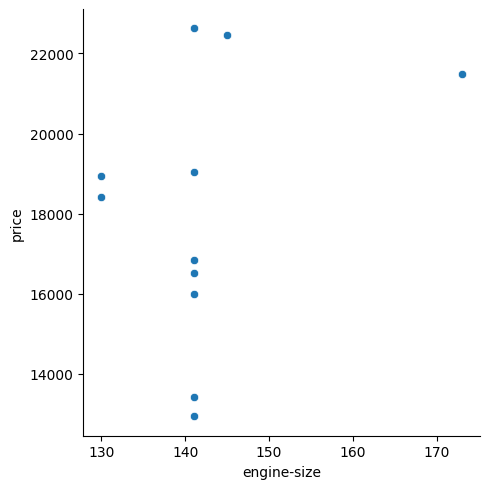

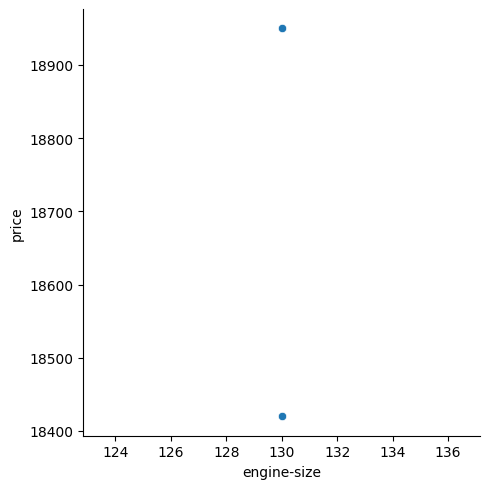

In [52]:
import seaborn as sns
# sns.relplot(x = "engine-size", y="price", data = autos)   # Obs för alla bilar

sns.relplot(x = "engine-size", y="price", data = autos[autos["make"] == "volvo"])     # Med boolmask för att plotta samma sak enbart för volvo

sns.relplot(x = "engine-size", y="price", data = autos.query("make =='volvo' and `engine-size` <= 140"))    # Samma sak men via .query


## Sorting dataframe

Dataframes can be sorted using the .sort_values() method

Parameters:
-**by** Column, or list of columns
-**ascending** Optional. Default = True

In [40]:
autos.sort_values(by="engine-size")         # sorterar all data enligt engine-size, från lägsta till högsta
autos.sort_values(by=["make", "engine-size"], ascending = [False, True])    # Här sorteras make baklänges, och  engine sizes stignade
# Kan även göras på flera kolumner. 



,aspiration,body-style,bore,city-mpg,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,engine-type,...,make,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width
198,turbo,sedan,3.62,17,7.5,3045,rwd,front,130,ohc,...,volvo,103.0,four,four,5100.0,18420.0,3.15,-2,104.3,67.2
199,turbo,wagon,3.62,17,7.5,3157,rwd,front,130,ohc,...,volvo,74.0,four,four,5100.0,18950.0,3.15,-1,104.3,67.2
194,std,sedan,3.78,23,9.5,2912,rwd,front,141,ohc,...,volvo,103.0,four,four,5400.0,12940.0,3.15,-2,104.3,67.2
195,std,wagon,3.78,23,9.5,3034,rwd,front,141,ohc,...,volvo,74.0,four,four,5400.0,13415.0,3.15,-1,104.3,67.2
196,std,sedan,3.78,24,9.5,2935,rwd,front,141,ohc,...,volvo,103.0,four,four,5400.0,15985.0,3.15,-2,104.3,67.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,std,sedan,3.19,19,8.5,2844,fwd,front,136,ohc,...,audi,158.0,five,four,5500.0,17710.0,3.40,1,105.8,71.4
7,std,wagon,3.19,19,8.5,2954,fwd,front,136,ohc,...,audi,NaN,five,four,5500.0,18920.0,3.40,1,105.8,71.4
0,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,13495.0,2.68,3,88.6,64.1
1,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,16500.0,2.68,3,88.6,64.1
